In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir(r'C:\Users\garla\first-node\WalkExplorer\routing\data')
df = pd.read_csv("adjusted_edges.csv")

C:\Users\garla\AppData\Local\Temp\ipykernel_5604\2598778917.py:7: DtypeWarning: Columns (15,34,35,36,37,38,39,40,41,42,43,44,45,46,47,63,64,65,66,67,68,69,70,71,72,73,74,75,76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("adjusted_edges.csv")


# Analyze length of edges and type of path segments

C:\Users\garla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


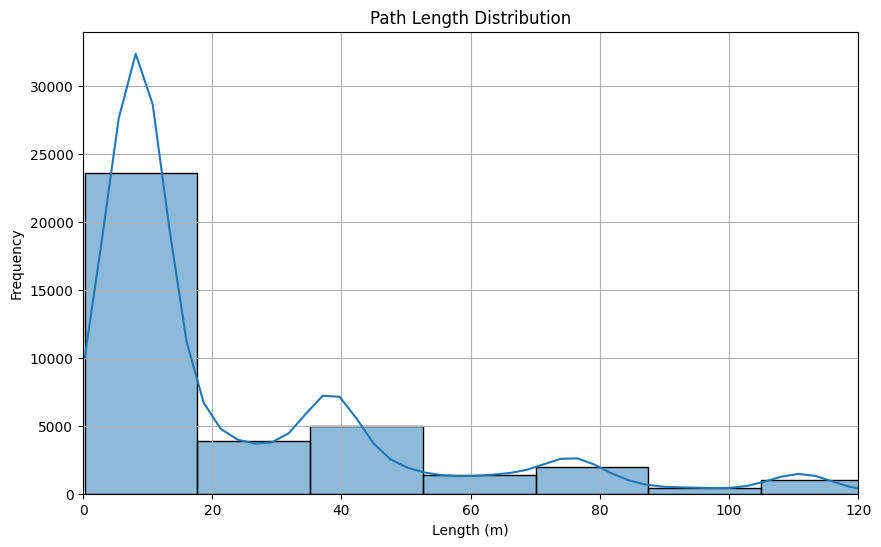

Length Statistics:
Average: 24.76
Min: 0.24
Max: 523.93
Median: 10.86
Q1: 7.61
Q3: 36.63


In [4]:
# ---- 1. Plot path length distribution ----
plt.figure(figsize=(10, 6))
sns.histplot(df['length'], kde=True, bins=30)
plt.title("Path Length Distribution")
plt.xlabel("Length (m)")
plt.ylabel("Frequency")
plt.xlim(0, 120)
plt.grid(True)
plt.show()

# ---- 2. Basic statistics ----
length_stats = {
    "Average": df['length'].mean(),
    "Min": df['length'].min(),
    "Max": df['length'].max(),
    "Median": df['length'].median(),
    "Q1": df['length'].quantile(0.25),
    "Q3": df['length'].quantile(0.75)
}

print("Length Statistics:")
for k, v in length_stats.items():
    print(f"{k}: {v:.2f}")


# Analyze type of highway for path segments

Highway Type Counts (Occurrences > 10):
highway
footway                    22382
service                     5092
residential                 2790
secondary                   2580
tertiary                    1652
primary                     1346
unclassified                 430
['footway', 'steps']         424
pedestrian                   342
steps                        106
living_street                 52
path                          48
['footway', 'corridor']       30
secondary_link                18
['footway', 'path']           16
primary_link                  16
['footway', 'service']        14
Name: count, dtype: int64


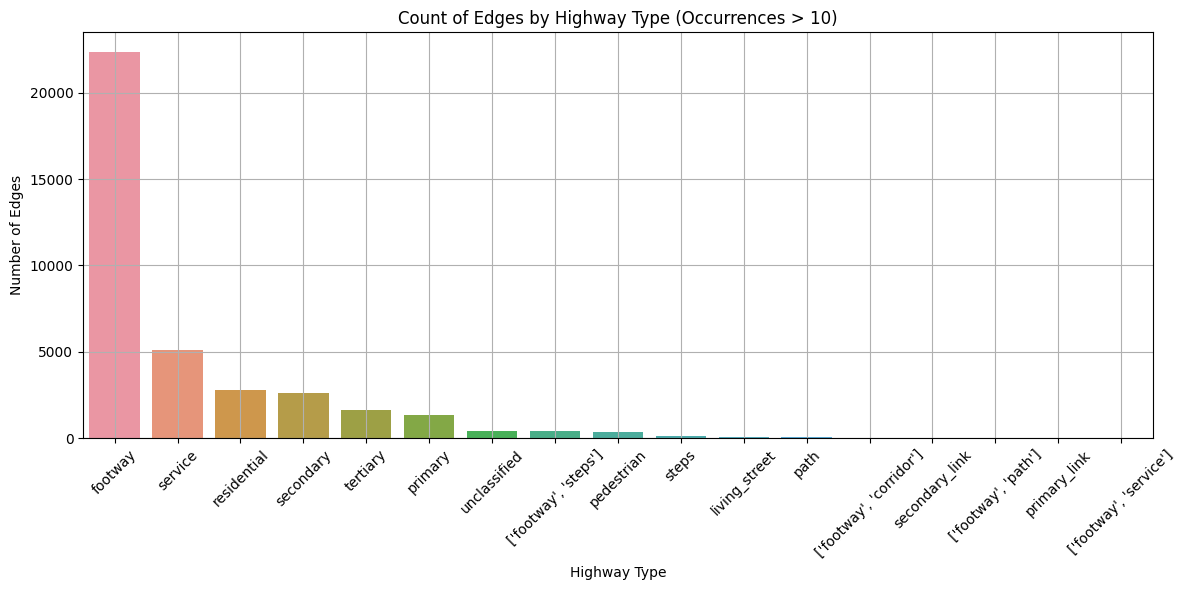

In [8]:
highway_counts = df['highway'].value_counts().sort_values(ascending=False)

# Filter out highway types with count <= 10
filtered_counts = highway_counts[highway_counts > 10]

# Print filtered counts
print("Highway Type Counts (Occurrences > 10):")
print(filtered_counts)

# Plot the filtered counts
plt.figure(figsize=(12, 6))
sns.barplot(x=filtered_counts.index, y=filtered_counts.values)
plt.title("Count of Edges by Highway Type (Occurrences > 10)")
plt.xlabel("Highway Type")
plt.ylabel("Number of Edges")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Using dataset from Masters Capstone 2024
# Number of images per edge

Number of Edges by Total Images:
0 images: 22 edges
1 image: 186 edges
2 images: 20520 edges
3 images: 11006 edges
4 images: 3214 edges
5 images: 1008 edges
6 images: 584 edges
7 images: 298 edges
8 images: 168 edges
9 images: 114 edges
10 images: 86 edges
11 images: 48 edges
12 images: 32 edges
13 images: 34 edges
14 images: 22 edges
15 images: 16 edges
16 images: 16 edges
17 images: 10 edges
18 images: 8 edges
19 images: 4 edges
20 images: 4 edges
21 images: 6 edges
22 images: 2 edges
23 images: 2 edges
26 images: 2 edges
29 images: 2 edges


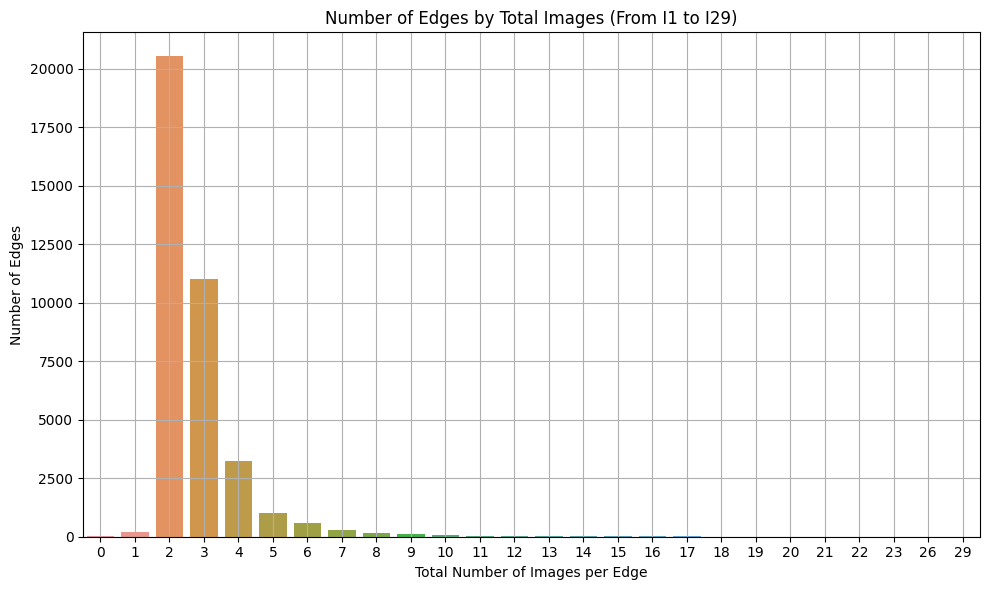

In [11]:
# Use only I1 to I29
image_cols = [f'I{i}' for i in range(1, 30)]
df['image_count'] = df[image_cols].notna().sum(axis=1)

# Count how many edges have N images
image_count_distribution = df['image_count'].value_counts().sort_index()

# Print counts in "N images: X edges" format
print("Number of Edges by Total Images:")
for num_images, edge_count in image_count_distribution.items():
    print(f"{int(num_images)} image{'s' if num_images != 1 else ''}: {edge_count} edge{'s' if edge_count != 1 else ''}")

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=image_count_distribution.index, y=image_count_distribution.values)
plt.title("Number of Edges by Total Images (From I1 to I29)")
plt.xlabel("Total Number of Images per Edge")
plt.ylabel("Number of Edges")
plt.grid(True)
plt.tight_layout()
plt.show()

# save and export edges with 0 images

In [12]:

zero_image_edges = df[df['image_count'] == 0][['u', 'v']]
zero_image_edges.to_csv("edges_with_0_images.csv", index=False)

print(f"Exported {len(zero_image_edges)} edges with 0 images to 'edges_with_0_images.csv'")

Exported 22 edges with 0 images to 'edges_with_0_images.csv'


# Using new dataset from summer research
# Number of images per edge

In [3]:
new_df = pd.read_csv("new_updated_edges_2.csv")

C:\Users\garla\AppData\Local\Temp\ipykernel_5604\2657199987.py:1: DtypeWarning: Columns (16,18,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df = pd.read_csv("new_updated_edges_2.csv")


Number of Edges by Total Images:
0 images: 2156 edges
1 image: 5758 edges
2 images: 19440 edges
3 images: 7258 edges
4 images: 1740 edges
5 images: 660 edges
6 images: 334 edges
7 images: 136 edges
8 images: 102 edges
9 images: 54 edges
10 images: 56 edges
11 images: 28 edges
12 images: 16 edges
13 images: 16 edges
14 images: 24 edges
15 images: 2 edges
17 images: 8 edges
18 images: 4 edges
19 images: 2 edges
27 images: 2 edges


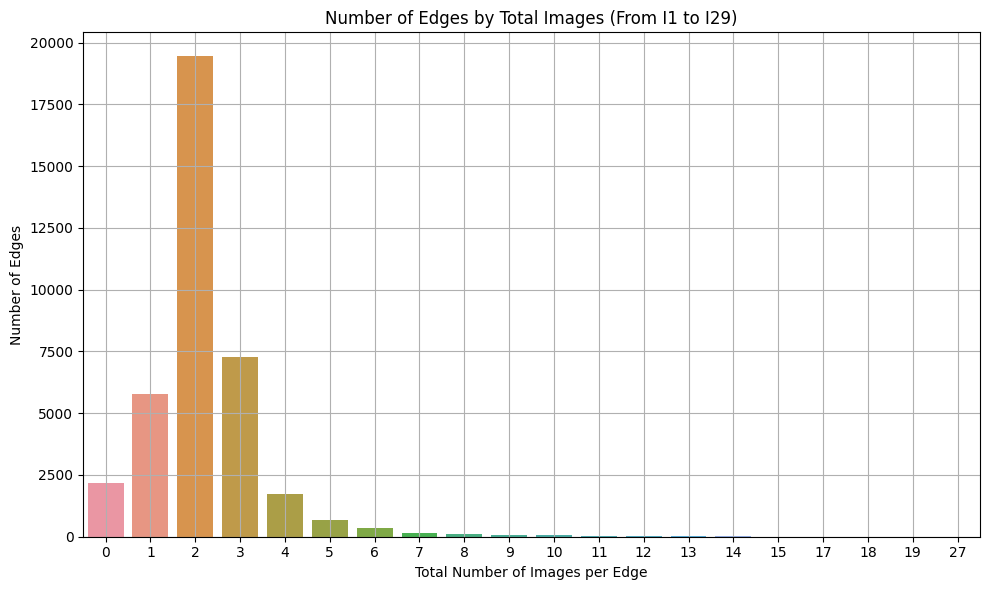

In [4]:
# Use only I1 to I29
image_cols = [f'I{i}' for i in range(1, 30)]
new_df['image_count'] = new_df[image_cols].notna().sum(axis=1)

# Count how many edges have N images
image_count_distribution = new_df['image_count'].value_counts().sort_index()

# Print counts in "N images: X edges" format
print("Number of Edges by Total Images:")
for num_images, edge_count in image_count_distribution.items():
    print(f"{int(num_images)} image{'s' if num_images != 1 else ''}: {edge_count} edge{'s' if edge_count != 1 else ''}")

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=image_count_distribution.index, y=image_count_distribution.values)
plt.title("Number of Edges by Total Images (From I1 to I29)")
plt.xlabel("Total Number of Images per Edge")
plt.ylabel("Number of Edges")
plt.grid(True)
plt.tight_layout()
plt.show()

# save and export edges with 0 images to a csv file

In [6]:

new_zero_image_edges = new_df[new_df['image_count'] == 0][['u', 'v']]
new_zero_image_edges.to_csv("new_edges_with_0_images.csv", index=False)

print(f"Exported {len(new_zero_image_edges)} new edges with 0 images to 'new_edges_with_0_images.csv'")

Exported 2156 new edges with 0 images to 'new_edges_with_0_images.csv'
